![alt text](https://www.nlab.org.uk/wp-content/uploads/NLABBlue.png)
# FBA Tutorial 9 - Sklearn II & Plotting


In [3]:
!wget -O week9_data.zip "https://drive.google.com/uc?export=download&id=1dVOeQ48ciZ-zG0k53OzXBAG44La-jI7D"
!unzip week9_data.zip

--2025-11-28 14:21:07--  https://drive.google.com/uc?export=download&id=1dVOeQ48ciZ-zG0k53OzXBAG44La-jI7D
Resolving drive.google.com (drive.google.com)... 142.250.140.102, 142.250.140.138, 142.250.140.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.140.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1dVOeQ48ciZ-zG0k53OzXBAG44La-jI7D&export=download [following]
--2025-11-28 14:21:08--  https://drive.usercontent.google.com/download?id=1dVOeQ48ciZ-zG0k53OzXBAG44La-jI7D&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.30.132, 2a00:1450:4009:c17::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.30.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17041 (17K) [application/octet-stream]
Saving to: ‘week9_data.zip’

week9_data.zip      100%[===================>]  16.64K  --.-KB/

## Section A: Classification via Sklearn

### Step A1 - Sklearn II

In Week 5 we were building and evaluating a decision tree model for predicting if a tumour sample was benign or malignant.

Let's follow our Orange flow:

In [4]:
import pandas as pd
cancer = pd.read_csv('orange_tutorial_1.tab', sep = '\t')
cancer.head()

,sample_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Unnamed: 11
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN


In [5]:
cancer.columns

Index(['sample_number', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'adhesion', 'cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class',
       'Unnamed: 11'],
      dtype='object')

In [6]:
cancer = cancer.drop("Unnamed: 11", axis = 1)

I know that there are weird values in this dataframe - you may not. But checking the data for nonnumeric characters might be useful in general...

In [7]:
# Option 1
# I know which column has a weird value
cancer.bare_nuclei.value_counts()

bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
~      16
9       9
7       8
6       4
Name: count, dtype: int64

In [ ]:
# Can drop like this directly:
# cancer = cancer[cancer.bare_nuclei != "~"]

In [8]:
# OR Option 2
# I do not know where is the weird value,
# but I forsee errors later

# I force my dataframe to be numeric:
cancer_num = cancer.apply(pd.to_numeric, errors='coerce')
# errors='coerce' will convert nonnumeric values to NaN.

In [9]:
cancer_num.isna().sum()

sample_number             0
clump_thickness           0
uniformity_cell_size      0
uniformity_cell_shape     0
adhesion                  0
cell_size                 0
bare_nuclei              16
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [10]:
# Drop NaNs
cancer_num.dropna(inplace = True)

Our positive class is malignant, let's recreate the 'class_binary' column with 1 if the sample was malignant ('class' value of 4), 0 - ('class' value of 2).

In [11]:
cancer_num['class_binary'] = (cancer_num['class'] == 4).astype(int)

Setting up input features and target variable using Pandas

In [12]:
X = cancer_num.iloc[:,1:10]
print(X.shape)
print(X.columns) #get input features

(683, 9)
Index(['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape',
       'adhesion', 'cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses'],
      dtype='object')


In [13]:
y = cancer_num.iloc[:,-1]
print(y.shape) #get target features

(683,)


Splitting training and testing samples

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(478, 9)
(205, 9)
(478,)
(205,)


Fitting a decision tree model

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #build the DT model and set up parameters
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 7, max_depth = 4)
dt.fit(X_train, y_train) #train decision tree models
pre_y = dt.predict(X_test) #predict with trained models

Testing the performance of the decision tree model

In [16]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score

accuracy_s = accuracy_score(y_test, pre_y)  # accuracy
precision_s = precision_score(y_test, pre_y)  # precision
recall_s = recall_score(y_test, pre_y)  # recall
f1_s = f1_score(y_test, pre_y)  # F1 score

print("Accuracy: ", accuracy_s)
print("Precision: ", precision_s)
print("Recall: ", recall_s)
print("F1: ", f1_s)

Accuracy:  0.9414634146341463
Precision:  0.8947368421052632
Recall:  0.9444444444444444
F1:  0.918918918918919


We've got all evaluation metrics with respect to the 'target' class (malignant).

But, there are other options, run the line below and [look up online](https://scikit-learn.org/1.5/modules/model_evaluation.html) what are other options for the 'average'

`precision_score(y_test, pre_y, average='macro')`

Plot the tree

Matplotlib is building the font cache; this may take a moment.


[Text(0.375, 0.9, 'x[1] <= 2.5\nentropy = 0.934\nsamples = 478\nvalue = [311, 167]'),
 Text(0.14285714285714285, 0.7, 'x[6] <= 4.0\nentropy = 0.146\nsamples = 289\nvalue = [283, 6]'),
 Text(0.2589285714285714, 0.8, 'True  '),
 Text(0.07142857142857142, 0.5, 'entropy = 0.0\nsamples = 278\nvalue = [278, 0]'),
 Text(0.21428571428571427, 0.5, 'entropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.6071428571428571, 0.7, 'x[1] <= 3.5\nentropy = 0.605\nsamples = 189\nvalue = [28, 161]'),
 Text(0.49107142857142855, 0.8, '  False'),
 Text(0.35714285714285715, 0.5, 'x[5] <= 2.5\nentropy = 0.988\nsamples = 39\nvalue = [22, 17]'),
 Text(0.21428571428571427, 0.3, 'x[7] <= 1.5\nentropy = 0.276\nsamples = 21\nvalue = [20, 1]'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.2857142857142857, 0.1, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.5, 0.3, 'x[7] <= 4.5\nentropy = 0.503\nsamples = 18\nvalue = [2, 16]'),
 Text(0.42857142857142855, 0.1, '

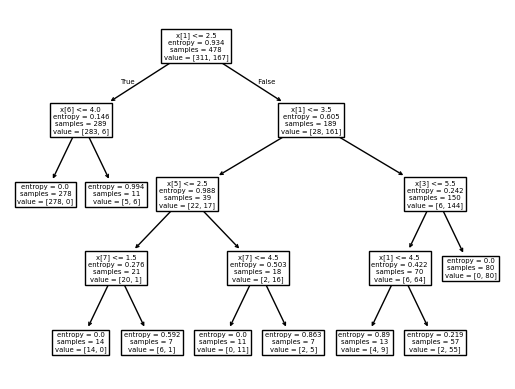

In [18]:
tree.plot_tree(dt)

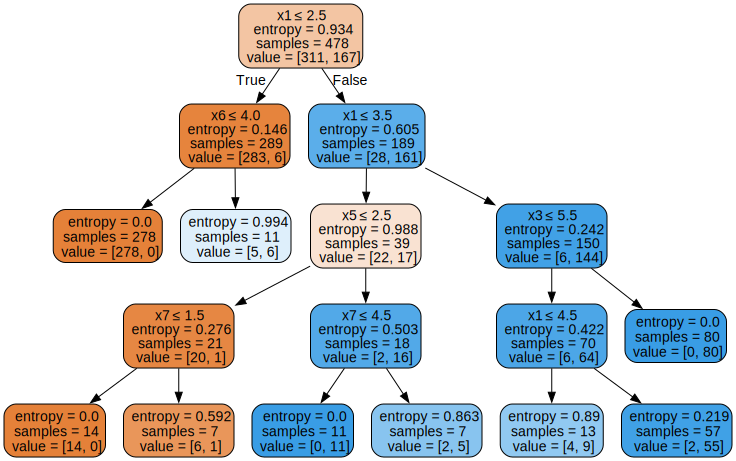

In [19]:
# OR
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)  #plot the tree
graph

**Why are both graphs not reducing the time to insight?**

***Answer:***

In [ ]:
# your answer


Now it is your turn to try other classification models!

### K-Nearest Neighbours (KNN) Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) #set k=5
knn.fit(X_train, y_train) #train the model
pre_y_knn = knn.predict(X_test) #predict with trained model

In [26]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score
accuracy_s_knn = accuracy_score(y_test, pre_y_knn)  # accuracy
precision_s_knn = precision_score(y_test, pre_y_knn)  # precision
recall_s_knn = recall_score(y_test, pre_y_knn)  # recall
f1_s_knn = f1_score(y_test, pre_y_knn)  #

print("Accuracy: ", accuracy_s_knn)
print("Precision: ", precision_s_knn)
print("Recall: ", recall_s_knn)
print("F1: ", f1_s_knn)

Accuracy:  0.9609756097560975
Precision:  0.9571428571428572
Recall:  0.9305555555555556
F1:  0.9436619718309859


Text(0.5, 1.0, 'KNN Decision Regions (PCA reduced to 2D)')

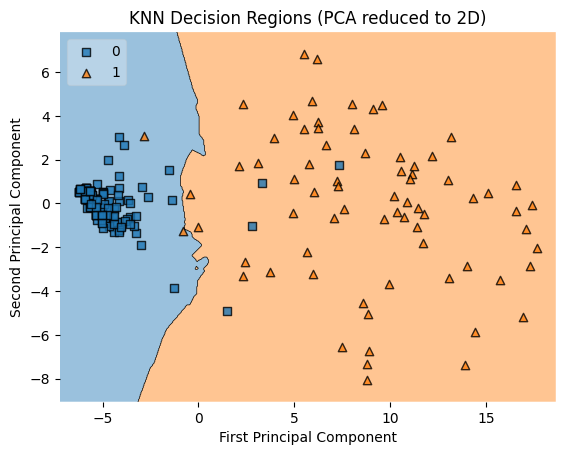

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_pca, y_train)

# Plot decision regions
plot_decision_regions(X_test_pca, y_test.values, clf=knn_2d, legend=2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KNN Decision Regions (PCA reduced to 2D)')

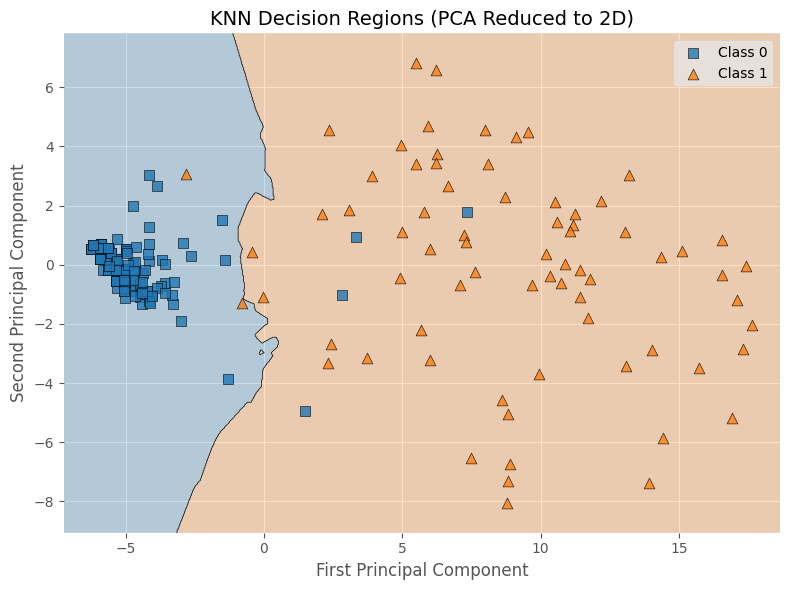

In [43]:
import matplotlib.pyplot as plt

# ----- Customization -----
class_names = ["Class 0", "Class 1"]   # Update if you have more classes
figsize = (8, 6)
alpha = 0.25

# ----- Plot -----
plt.style.use("ggplot")
plt.figure(figsize=figsize)

plot_decision_regions(
    X_test_pca,
    y_test.values,
    clf=knn_2d,
    legend=2,
    scatter_kwargs={"s": 60, "edgecolor": "k"},
    contourf_kwargs={"alpha": alpha}
)

# Labels & title
plt.xlabel("First Principal Component", fontsize=12)
plt.ylabel("Second Principal Component", fontsize=12)
plt.title("KNN Decision Regions (PCA Reduced to 2D)", fontsize=14)

# Optional: replace numeric legend labels with class names
handles, labels = plt.gca().get_legend_handles_labels()
if len(class_names) == len(labels):
    plt.legend(handles, class_names, frameon=True)

plt.tight_layout()

# Optional: save the figure
# plt.savefig("knn_pca_decision_regions.png", dpi=300)

plt.show()


### NAive Bayes Classifier

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
pre_y_nb = nb.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score
accuracy_s_nb = accuracy_score(y_test, pre_y_nb)  # accuracy
precision_s_nb = precision_score(y_test, pre_y_nb)  # precision
recall_s_nb = recall_score(y_test, pre_y_nb)  # recall
f1_s_nb = f1_score(y_test, pre_y_nb)  # F1

print("Accuracy: ", accuracy_s_nb)
print("Precision: ", precision_s_nb)
print("Recall: ", recall_s_nb)
print("F1: ", f1_s_nb)

Accuracy:  0.9121951219512195
Precision:  0.8970588235294118
Recall:  0.8472222222222222
F1:  0.8714285714285714


Text(0.5, 1.0, 'Naive Bayes Decision Regions (PCA reduced to 2D)')

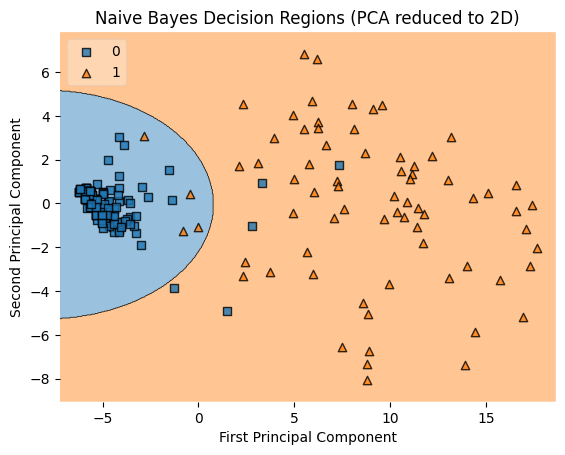

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_2d = GaussianNB()
nb_2d.fit(X_train_pca, y_train)

# Plot decision regions
plot_decision_regions(X_test_pca, y_test.values, clf=nb_2d, legend=2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Naive Bayes Decision Regions (PCA reduced to 2D)')

### Comparison of Models

In [39]:
print(f'Accuracy DT vs KNN vs NB: {accuracy_s} vs {accuracy_s_knn} vs {accuracy_s_nb}')
print(f'Precision DT vs KNN vs NB: {precision_s} vs {precision_s_knn} vs {precision_s_nb}')
print(f'Recall DT vs KNN vs NB: {recall_s} vs {recall_s_knn} vs {recall_s_nb}')
print(f'F1 DT vs KNN vs NB: {f1_s} vs {f1_s_knn} vs {f1_s_nb}')

Accuracy DT vs KNN vs NB: 0.9414634146341463 vs 0.9609756097560975 vs 0.9121951219512195
Precision DT vs KNN vs NB: 0.8947368421052632 vs 0.9571428571428572 vs 0.8970588235294118
Recall DT vs KNN vs NB: 0.9444444444444444 vs 0.9305555555555556 vs 0.8472222222222222
F1 DT vs KNN vs NB: 0.918918918918919 vs 0.9436619718309859 vs 0.8714285714285714


### Step A2 - Prep Admissions Dataset

As in one of the previous tutorials, we will be using the **admissions.csv** file (available from the moodle page). This file describes people who are applying for a postgraduate degree at a US university, and indicates 3 relevant features about an applicant… as well as whether they got into to the masters or PhD course they were applying for when they were selected by hand (note that if we were doing a full analytics project, this would be our target class!):

* The dataset has a binary output feature (i.e. dependent variable) called "admit".
* There are three predictor variables: gre, gpa and ranking.
* Variables gre (a exam result score) and gpa (the person’s grade point average) are continuous.
* The variable ranking takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

Now, let's repeat what was done some weeks ago.

In [20]:
import pandas as pd
df = pd.read_csv('admissions.csv')
df.head(5)

,admit,gre,gpa,ranking
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [ ]:
# And updating the values of the column admit:

In [21]:
df.loc[df.admit == 1, 'admit'] = True
df.loc[df.admit == 0, 'admit'] = False
df.head()

/var/folders/kf/5c3rzd1n3mg01xt7v99dzfvr0000gn/T/ipykernel_7635/4202755822.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.admit == 1, 'admit'] = True


,admit,gre,gpa,ranking
0,False,380,3.61,3
1,True,660,3.67,3
2,True,800,4.00,1
3,True,640,3.19,4
4,False,520,2.93,4


Finally, we really want to show how each feature’s values differ for one class compared to the other (this would be useful for example, in a coursework to investigate who buy a product and who don’t)

Let’s do this now by separating the positives (admitted - True) from the negatives (rejected - False) in our dataset. Using pandas filtering, assign to a variable pos the dataframe of students who were admitted and to a variable neg the students that were rejected.

In [ ]:
# your code here

What this means is that we now can print summary statistics to compare between successful and unsuccessful applicants using the describe( ) method on the two separate dataframes.

In [22]:
pos.describe()

NameError: name 'pos' is not defined

In [ ]:
neg.describe()

## Section B

This section focuses on the use of matplotlib.

### Step B1 - A picture is as good as a thousand words...

What is the best way to illustrate our data? Well, statistics are all good, but graphs are often better to demonstrate things you have found in your analyses. As I am speaking, dashboards are becoming more and more popular by throwing several graphs together (e.g., with the use of software, such as Tableau).

To start, “matplotlib”  library (and its extensions) makes well-known plots and their customization easy.

Let’s just see how we could make a bar chart comparing the number of datapoints which were positive and negative.
First, here is how we can do it the 'manual' way using matplotlib:

In [23]:
import matplotlib.pyplot as plt

labels = ['rejected', 'admitted']
values = [len(neg), len(pos)]
plt.bar([0, 1], values, align='center', color=['red', 'green'])
plt.xticks([0, 1], labels)
#plt.show()

NameError: name 'neg' is not defined

Well, that wasn't too bad… but it was several lines let's break what is going on here down line by line:
1. We import the matplotlib library (and call it “plt”) so we can use its functions.
2. We create a list of the labels for the bars.
3. We create a list of values for the bar's heights (in this case the number of items in each category).
4. We create the bar chart (at positions 0 and 1, aligning the bars to the centre and making them red and green in colour.
5. We add the bar's labels to the plot.
6. And finally we show the results on screen.

### Step B2 - Visualising the mean

Now let's create a bar chart for the mean gpa score for each class by copying and altering the code of the previous step.

You can compute the mean using either a Pandas method or a Numpy function.

In [ ]:
# your code here

### Step B3 - Visualising the variance

Create a bar chart for the variance score for each class (you might want to use numpy function np.var() to do this rather than square the standard deviation).

In [ ]:
import numpy as np
# your code here

Now, yes, these images still have a horrible grey background, and the fonts aren’t the most beautiful, but these are all editable. Take a look at the tutorials online for making beautiful matplotlib graphs (they are easy to cut and paste) if you get a chance.

However, we have a second option using this time the **seaborn** library.

## Section C

This section focuses on the use of Seaborn.

### Step C1 - Reproducing B1 in Seaborn

We want to reproduce the graph done at Step B1 using Seaborn this time. The first thing, as usual and as described in the lecture, is to import the necessary module(s).

Note that in this case, matplotlib.pyplot has already been imported for the previous questions so we don't need to re-import it.

In [ ]:
import seaborn as sns

We can then produce the bar plot using the following code:

In [ ]:
sns.barplot(x='admit', y='gpa', data=df)

# OR
#sns.barplot(data=[neg.gpa, pos.gpa])

### Step C2 - Styling the plot

Seaborn has a range of colour palettes (look them up on google). You can specify a palette by adding the following argument to your plotting code (in our case the call to the barplot function):

> palette = 'Set1'

But it also has lots of built in style’s for the whole graph. Let’s try one now by adding the following line before your barplot command:

> sns.set_style('whitegrid')

Rerun and you’ll see you now have a graph worth of using in a report. Feel free to take a look at some other options for these styles:
* darkgrid
* whitegrid
* dark
* white
* ticks

Try different styles to make the plot a bit prettier !

### Step C3 - Boxplots

Finally, let’s abandon bar charts all together. They are fine for just listing the counts of admissions here, but they will tell us very little information about our covariates - gpa scores, gre scores and university rankings. What we really want as analysts are box plots!

Copy the code from C1 and convert it to use boxplots instead. You can refer to the documentation to find how the boxplot function is used:

http://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

In [ ]:
# your code here

Each solid box represents the second and third quartiles of the data indicating the spread/variance of the data, the horizontal line through each box is the median, and the vertical lines show the limits of the dataset. All useful stuff for interpretation.

That’s all there is to it for producing nice graphs. There’s a huge amount of options to play around with, and I recommend having a go on the different options for adding labels, changing fonts, using different palettes and so on (I’ll leave you to google the endless tutorials and documentation on matplotlib and seaborn at your leisure!)

*Having said that there is also a competitor to boxplots that’s worth noting in the form of violinplots*

### Step C4 - Violin Plots

Finally produce a violin plot for the GPA scores using the sns.violinplot() method. It’s as simple as changing the method name in your code. Once again, you can use the online documentation to find the different options available if you need further tweaking.

In [ ]:
# your code here

Now we can see the exact distribution of the data. Not bad, but is it better? You decide.

## Section D

In this section we are going to focus on the relationship between GRE and GPA scores using visual tools.

In [ ]:
# building a linear model like in week 7
from sklearn import linear_model
X = df[['gpa']]
Y = df[['gre']]
model = linear_model.LinearRegression()
model.fit(X,Y)
print(model.coef_, model.intercept_)

### Step D1 - Matplotlib & Linear Regression

We can plot the regression line obtained on top of the data in matplotlib using the following code:

In [ ]:
plt.plot(df.gpa, df.gre, '+')
lrline = model.coef_[0][0] * df.gpa + model.intercept_[0]
plt.plot(df.gpa, lrline)
#plt.show()

### Step D2 - Seaborn & Linear Regression

Try to obtain a similar visualisation using Seaborn and its lmplot() function. You can refer to the lecture slides and the online documentation of Seaborn to know more about its usage. Its a whole lot easier than the matplotlib code!

In [ ]:
# your code here

### Step D3 - Seaborn & Pairwise relationship

Finally, using Seaborn's pairplot() function.

In [ ]:
# your code here

### Additional Practice

If you are tired of this dataset and want to practice more, try to repeat some of the steps above on additional datasets, e.g., **national_school_data_2021.csv** in Moodle.

Or re-do the modelling in Python using datasets from previous weeks.

In [ ]:
df_ns = pd.read_csv('national_school_data_2021.csv')

In [ ]:
df_ns.head(2)

In [ ]:
# building a linear model like in week 3
df_t = pd.read_csv('weekly_temperature_data.csv')

In [ ]:
# clean the data from NaN

In [ ]:
from sklearn import linear_model
X = df_t[['Average daily temp (0F)']]
Y = df_t[['Average daily admissions']]
linmod_t = linear_model.LinearRegression()
linmod_t.fit(X,Y)
print(linmod_t.coef_, linmod_t.intercept_)